# Zomato Data Analysis Using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
zom_df = pd.read_csv("Zomato-data-.csv")
zom_df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Data Exploration

## Before going further we will convert the votes column into a float datatype and return only the denominator

In [4]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

zom_df['rate']=zom_df['rate'].apply(handleRate)
zom_df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


## General info about the data set

In [5]:
zom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Checking for NULL values

In [6]:
zom_df.isnull().sum()


name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

- This indicates we have no NULL values 

# Data Analysis

## Count of Listings

C:\Users\srivastavash\AppData\Local\Temp\ipykernel_32320\1893355306.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=zom_df['listed_in(type)'], palette='rainbow')


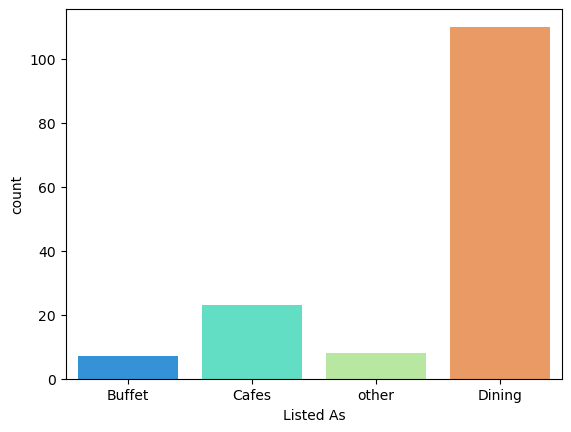

In [9]:
sns.countplot(x=zom_df['listed_in(type)'], palette='rainbow')
plt.xlabel('Listed As')
plt.show()

- Majority of Restaurants are listed as dining 

## Most preferred type
_we will conclude this by checking which type of restaurants have the most votes, we are creating an assumption that if the number of votes are high then the category is the most tried by the customers_

In [10]:
grouped_data = zom_df.groupby('listed_in(type)')['votes'].sum()
grouped_data

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

In [14]:
most_voted=pd.DataFrame({'votes':grouped_data})
most_voted

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


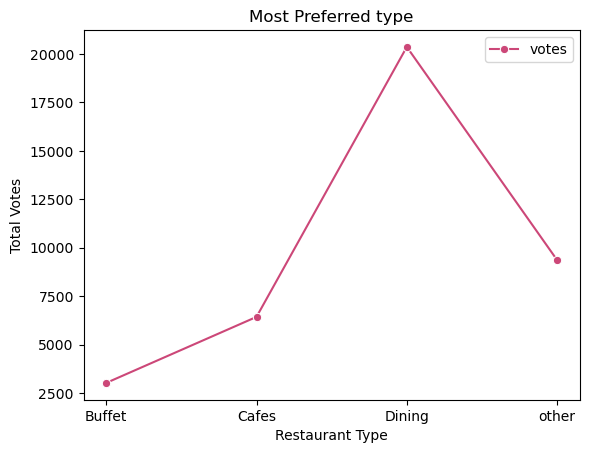

In [24]:
sns.lineplot(most_voted, palette='plasma', marker='o')
plt.ylabel('Total Votes')
plt.xlabel('Restaurant Type')
plt.title('Most Preferred type')
plt.show()

- Dining restaurants are preferred by a larger number of individuals.



# Finding the most voted restaurant

In [49]:
max_votes = zom_df['votes'].max()
restaurant_with_max_votes = zom_df.loc[zom_df['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


# Checking the count of whether restaurants accepts Online Orders

C:\Users\srivastavash\AppData\Local\Temp\ipykernel_32320\1997854314.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=zom_df['online_order'], palette='magma')


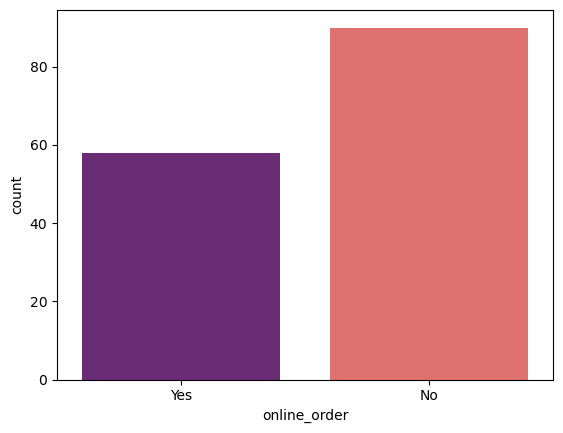

In [51]:
sns.countplot(x=zom_df['online_order'], palette='magma')
plt.show()

- We can see that most restaurans do not accept online orders 

# Which Restaurants is preferred by Couples in terms of approx cost of two people

C:\Users\srivastavash\AppData\Local\Temp\ipykernel_32320\3426111756.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=zom_df['approx_cost(for two people)'], palette='coolwarm')


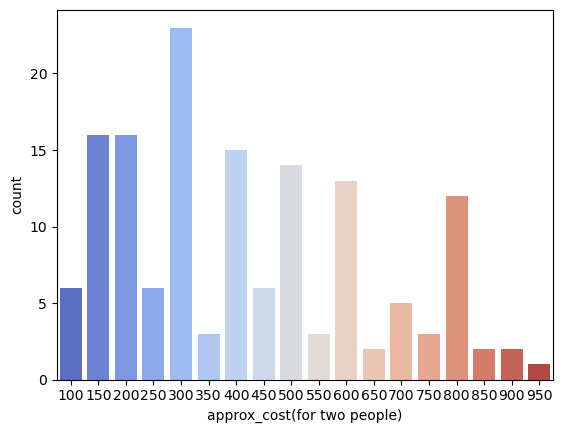

In [52]:
sns.countplot(x=zom_df['approx_cost(for two people)'], palette='coolwarm')
plt.show()

- This shows most couples prefer restaurants with order value for two of 300 rupees

# Online Order vs Ratings

C:\Users\srivastavash\AppData\Local\Temp\ipykernel_32320\1368047687.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'online_order', y = 'rate', data = zom_df, palette='pastel')


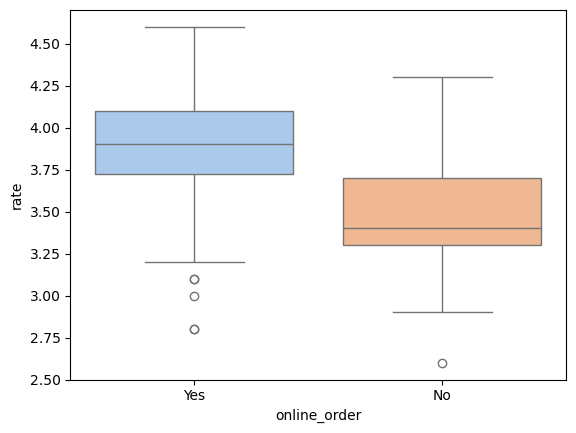

In [72]:
sns.boxplot(x = 'online_order', y = 'rate', data = zom_df, palette='pastel')
plt.show()

- Restaurants the support online orders are highly rated

# Analysing which types of restaurants have best ratings and supports online orders 

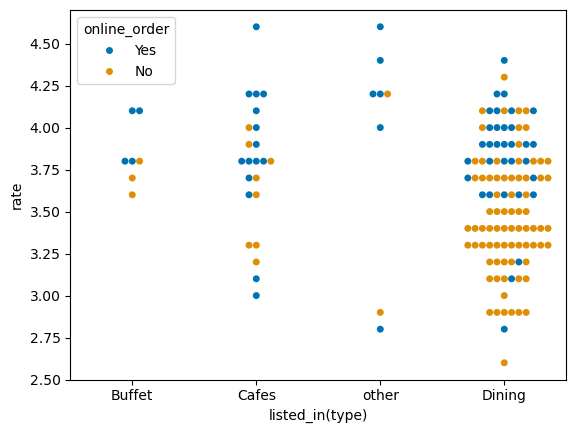

In [70]:
sns.swarmplot(x=zom_df['listed_in(type)'],y=zom_df['rate'], hue=zom_df['online_order'],palette='colorblind')
plt.show()

- On an average dining restaurants have good ratings, variety but not all of them supports online orders, whereas others have similar or higher ratings maybe less variety but most of them supports online orders 

# Correlation between Listed type and online orders

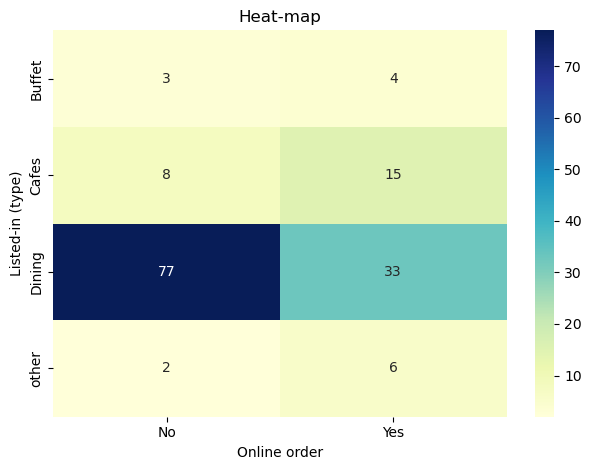

In [74]:
ct = pd.crosstab(zom_df['listed_in(type)'],
                 zom_df['online_order'])

sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heat‑map")
plt.xlabel("Online order")
plt.ylabel("Listed‑in (type)")
plt.tight_layout()
plt.show()

- Here we can conclude:
- Dining restaurants supports offline orders more
- Cafes,Buffets and Others have higher percentage of online orders acceptance
